# Walmart Sales Analysis and Prediction

# 1) Introduction:

### This dataset, originally sourced from Kaggle, represents historical data for Walmart store sales. It provides insights into weekly sales trends across various stores and examines factors that may influence sales performance. The dataset is structured with key features, including:

#### Store: Identifier for the Walmart store.
#### Date: The date for the recorded sales data.
#### Weekly_Sales: Total sales for the week, measured in dollars.
#### Holiday_Flag: A binary indicator (1 for a holiday week, 0 otherwise).
#### Temperature: Average temperature for the week in Fahrenheit.
#### Fuel_Price: Average price of fuel during the week.
#### CPI: Consumer Price Index, a measure reflecting changes in the price level of goods and services.
#### Unemployment: Unemployment rate for the corresponding time period.

# 2) Data Loading and Preprocessing

### 2.1)Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder , FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score ,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor ,plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.seasonal import seasonal_decompose


C:\Users\Nexgen\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 2.2) Loading the Dataset

In [9]:
df= pd.read_csv("Walmart.csv")
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
# df["Weekly_Sales"].max()
df["Weekly_Sales"].mean()
# per store weekly avg


1046964.8775617715

In [3]:
total_weekly_sales = df["Weekly_Sales"].sum()  # Total weekly sales across all stores
number_of_stores = 45  # Total number of stores

# Calculate the average weekly sales per store
average_weekly_sales_per_store = total_weekly_sales / number_of_stores

print(f"Average weekly sales per store: {average_weekly_sales_per_store}")

Average weekly sales per store: 149715977.49133334


### 2.3) Data Exploration

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.shape

(6435, 8)

In [9]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

### 2.4) Correlation Analysis

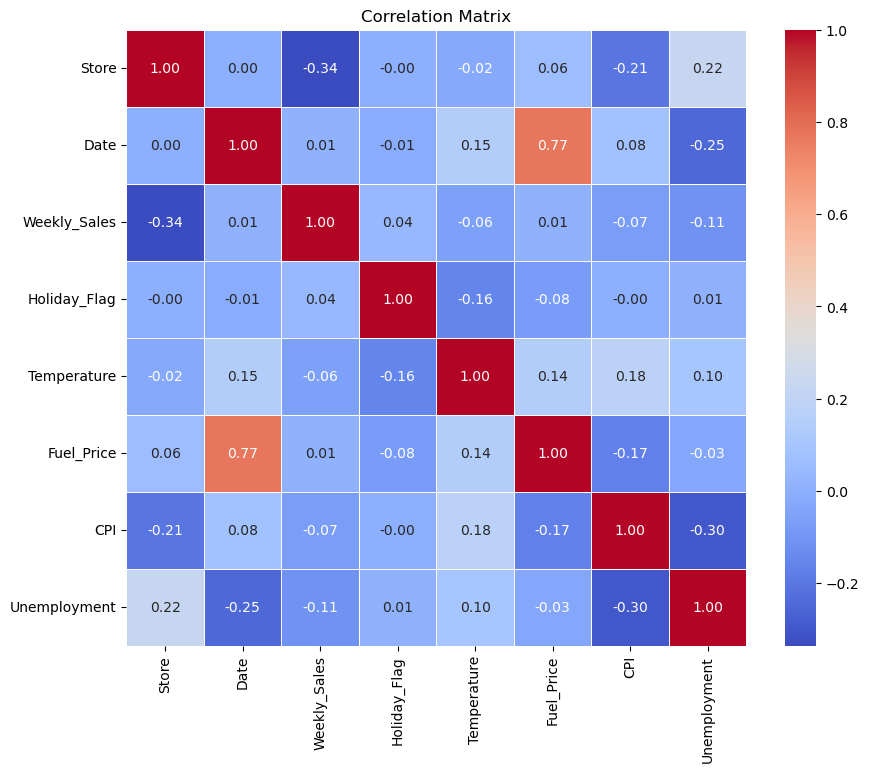

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

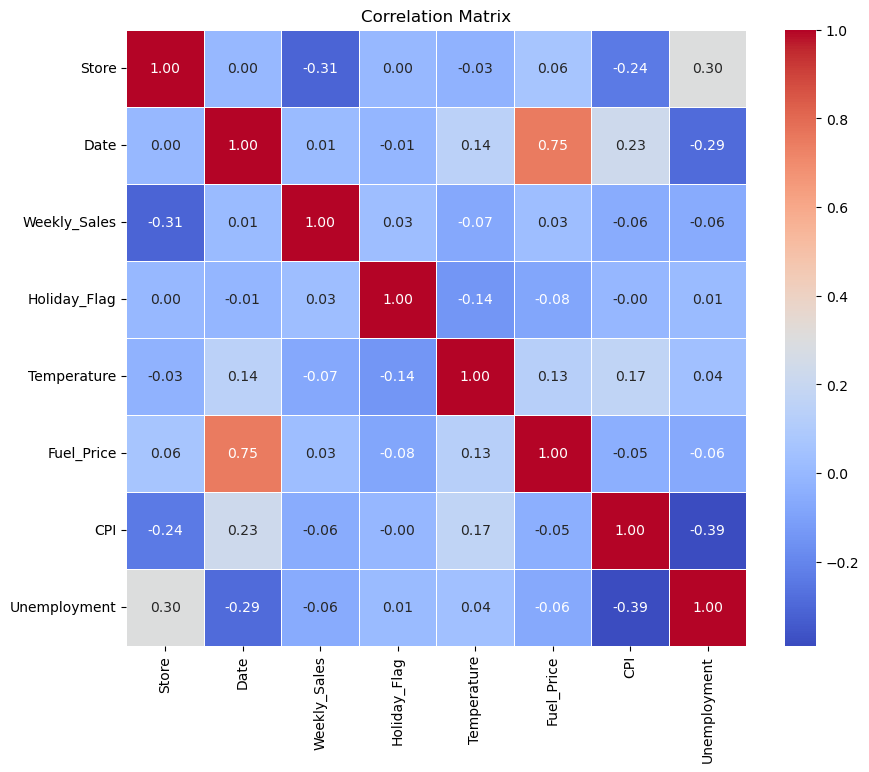

In [14]:
correlation_matrix = df.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

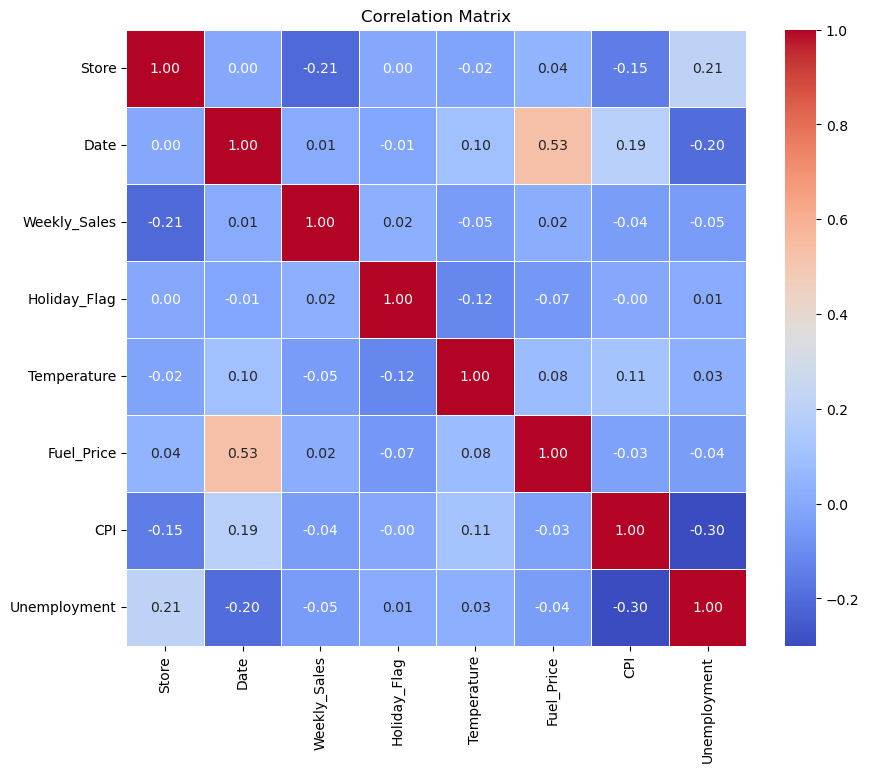

In [8]:
correlation_matrix = df.corr(method="kendall")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# 3) Data Preprocessing

### 3.1) Checking Missing Values

In [11]:
df.isnull().sum() #No missing values in it

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### 3.2) Checking Duplicates Values 

In [12]:
df.drop_duplicates() # No duplicates in the csv file

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### 3.3) Handling Date Values

In [6]:
df["Date"]=pd.to_datetime(df["Date"], format='%d-%m-%Y')
df["Date"]

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [15]:
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
# df = df.drop(columns=["Date"],inplace=True)


In [16]:
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Year  Month  Day  


### 3.4)Checking Outliers

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_13352\2345907331.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'], kde=True)
C:\Users\Nexgen\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nexgen\AppData\Local\Temp\ipykernel_13352\2345907331.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with


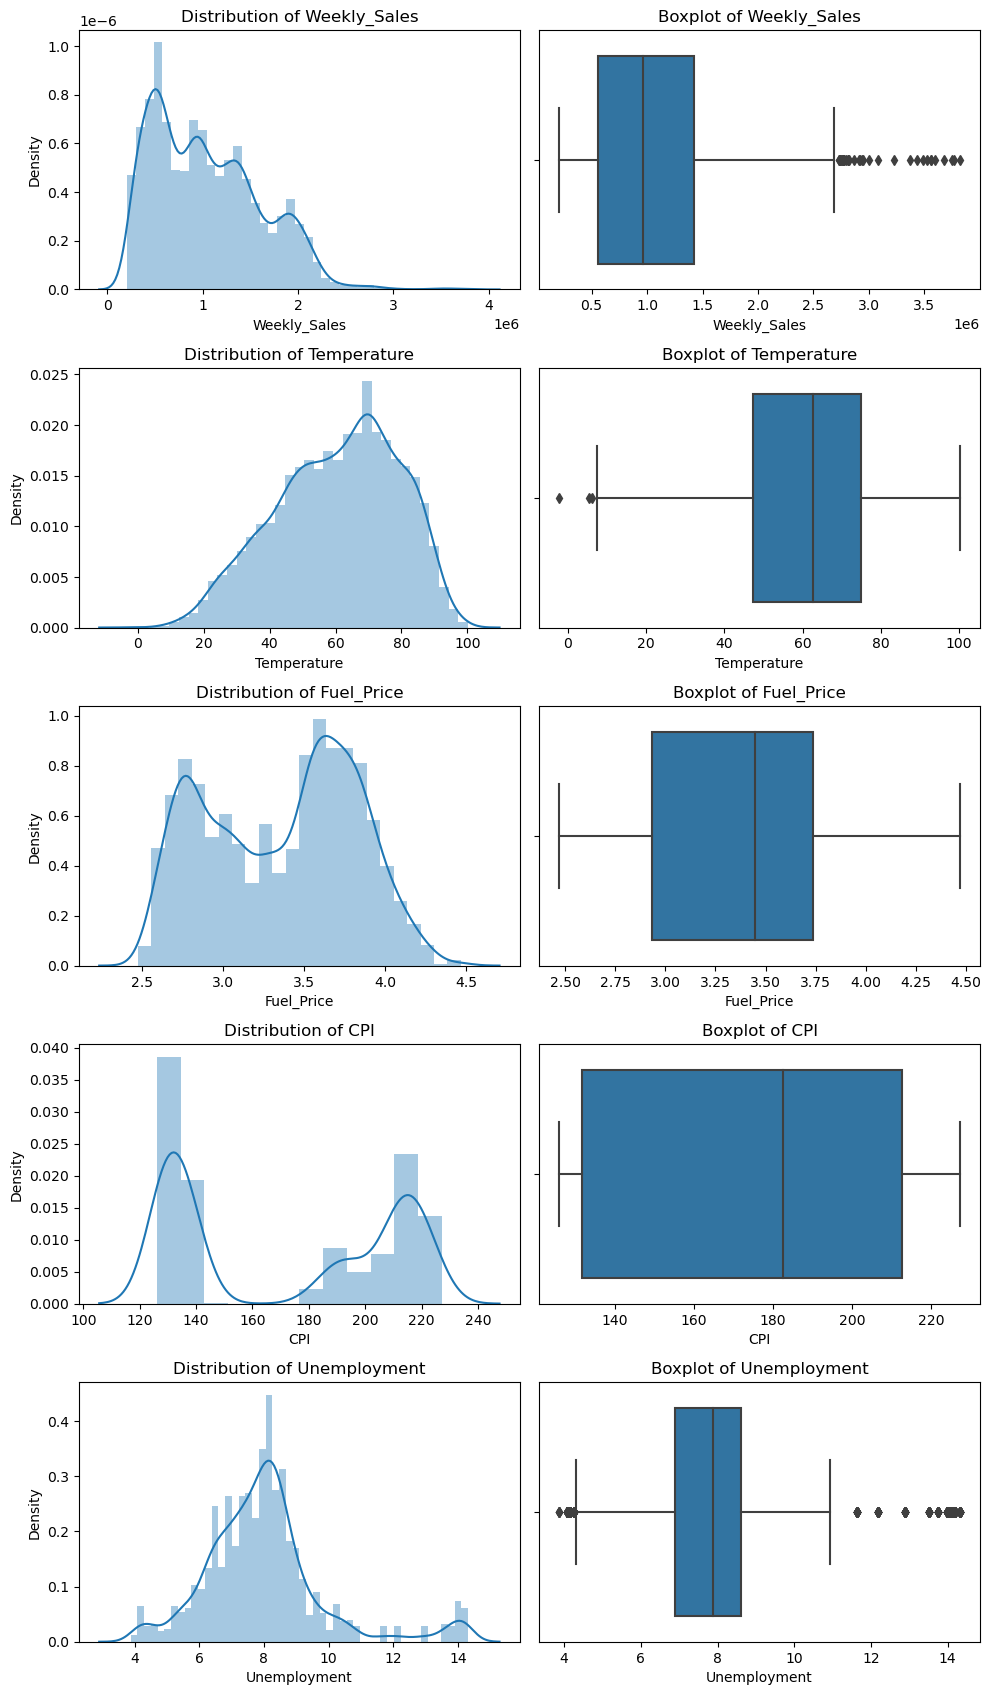

In [17]:
# Set the figure size
plt.figure(figsize=(10, 20))

# Plot 1: Distribution and Boxplot of Weekly_Sales
plt.subplot(6, 2, 1)
sns.distplot(df['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly_Sales')

plt.subplot(6, 2, 2)
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Boxplot of Weekly_Sales')

# Plot 2: Distribution and Boxplot of Temperature
plt.subplot(6, 2, 3)
sns.distplot(df['Temperature'])
plt.title('Distribution of Temperature')

plt.subplot(6, 2, 4)
sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature')

# Plot 3: Distribution and Boxplot of Fuel_Price
plt.subplot(6, 2, 5)
sns.distplot(df['Fuel_Price'])
plt.title('Distribution of Fuel_Price')

plt.subplot(6, 2, 6)
sns.boxplot(x=df['Fuel_Price'])
plt.title('Boxplot of Fuel_Price')

# Plot 4: Distribution and Boxplot of CPI
plt.subplot(6, 2, 7)
sns.distplot(df['CPI'])
plt.title('Distribution of CPI')

plt.subplot(6, 2, 8)
sns.boxplot(x=df['CPI'])
plt.title('Boxplot of CPI')

# Plot 5: Distribution and Boxplot of Unemployment
plt.subplot(6, 2, 9)
sns.distplot(df['Unemployment'])
plt.title('Distribution of Unemployment')

plt.subplot(6, 2, 10)
sns.boxplot(x=df['Unemployment'])
plt.title('Boxplot of Unemployment')

# Adjust layout
plt.tight_layout()
plt.show()

#### There are outliers in the columns Weekly sales, Temperature and Unemployments , So we will remove Outliers for better results..


### 3.4.1) Removing Outliers of Weekly Sales:

#### As we can see the Weekly Sales Date is Left Skewed so we can apply Z-score treatment on it so we are using IQR method to remove outliers

In [18]:
print(df["Weekly_Sales"].min())
print(df["Weekly_Sales"].max())
print(df["Weekly_Sales"].std())
print(df["Weekly_Sales"].mean())

percentile25=df["Weekly_Sales"].quantile(0.25)
percentile75=df["Weekly_Sales"].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit_weekly_sales=percentile75 +1.5 * iqr
lower_limit_weekly_sales=percentile75 -1.5 * iqr
print("Upper Limit:",upper_limit_weekly_sales)
print("Lower Limit:",lower_limit_weekly_sales)

print("Weekly Sales Above Upper Limit Data Points",df[df["Weekly_Sales"]>upper_limit_weekly_sales].shape)

print("Weekly Sales Below Lower Limit Data Points",df[df["Weekly_Sales"]<lower_limit_weekly_sales].shape)

df = df[df["Weekly_Sales"] < upper_limit_weekly_sales]



209986.25
3818686.45
564366.6220536975
1046964.8775617715
Upper Limit: 2720371.4924999997
Lower Limit: 119945.8274999999
Weekly Sales Above Upper Limit Data Points (34, 11)
Weekly Sales Below Lower Limit Data Points (0, 11)


### 3.4.2) Removing Outliers of Temperature 

In [19]:
print(df["Temperature"].mean())
print(df["Temperature"].std())
print(df["Temperature"].min())
print(df["Temperature"].max())

upper_limit_temp = df["Temperature"].mean() + 3* df["Temperature"].std()
lower_limit_temp = df["Temperature"].mean() - 3* df["Temperature"].std()

print("Upper Limit:",upper_limit_temp)
print("Lower Limit:",lower_limit_temp)

print("Temperature Above Upper Limit Data Points",df[df["Temperature"] > upper_limit_temp].shape)

print("Temperature Below Lower Limit Data Points",df[df["Temperature"] < lower_limit_temp].shape)

df = df[df["Temperature"] > lower_limit_temp]


60.77204186845805
18.417067589487388
-2.06
100.14
Upper Limit: 116.02324463692021
Lower Limit: 5.520839099995882
Temperature Above Upper Limit Data Points (0, 11)
Temperature Below Lower Limit Data Points (1, 11)


### 3.4.3) Removing Outliers of Unemployment 

In [20]:
print(df["Unemployment"].mean())
print(df["Unemployment"].std())
print(df["Unemployment"].min())
print(df["Unemployment"].max())

upper_limit_un = df["Unemployment"].mean() + 3* df["Unemployment"].std()
lower_limit_un = df["Unemployment"].mean() - 3* df["Unemployment"].std()

print("Upper Limit",upper_limit_un)
print("Lower Limit ",lower_limit_un)

print("Unemployment Above Upper Limit Data Points",df[df["Unemployment"] > upper_limit_un].shape)
print("Unemployment Below Lower Limit Data Points",df[df["Unemployment"] < lower_limit_un].shape)

df = df[df["Unemployment"] < upper_limit_un]


8.00217015625
1.8788243763029397
3.879
14.313
Upper Limit 13.638643285158818
Lower Limit  2.36569702734118
Unemployment Above Upper Limit Data Points (219, 11)
Unemployment Below Lower Limit Data Points (0, 11)


# 3) EDA

In [23]:
# sns.heatmap(df.isnull())


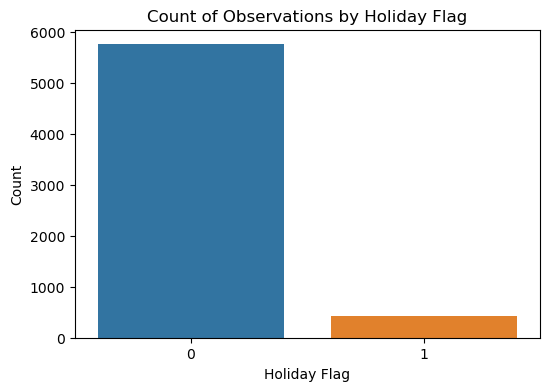

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Holiday_Flag', data=df)
plt.title('Count of Observations by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()

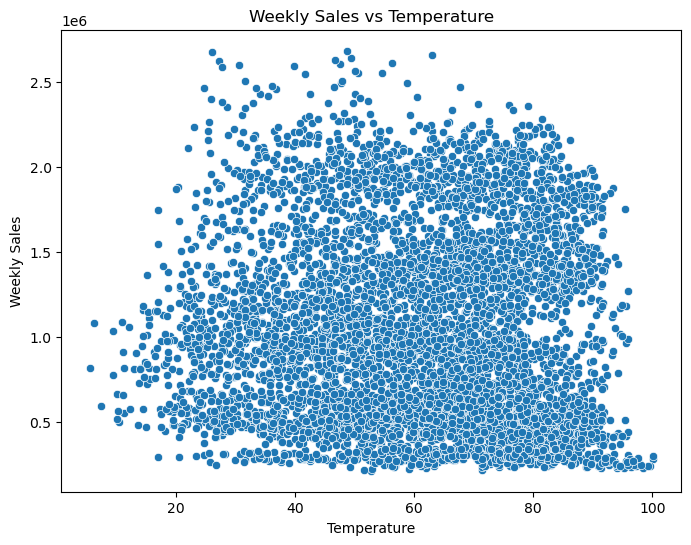

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

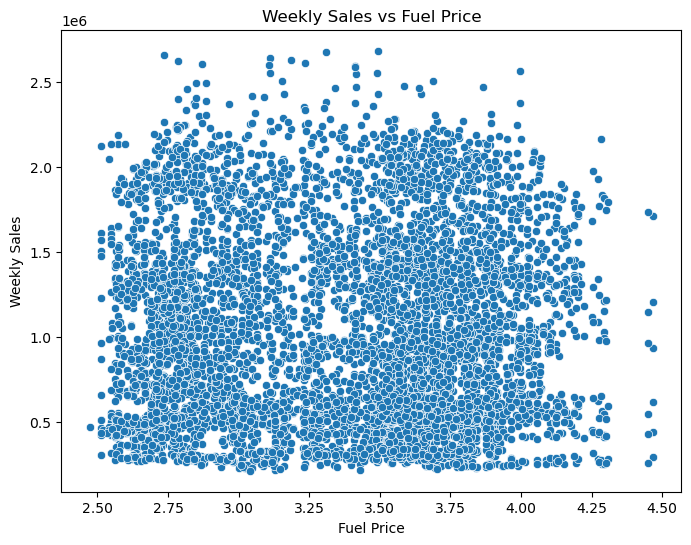

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

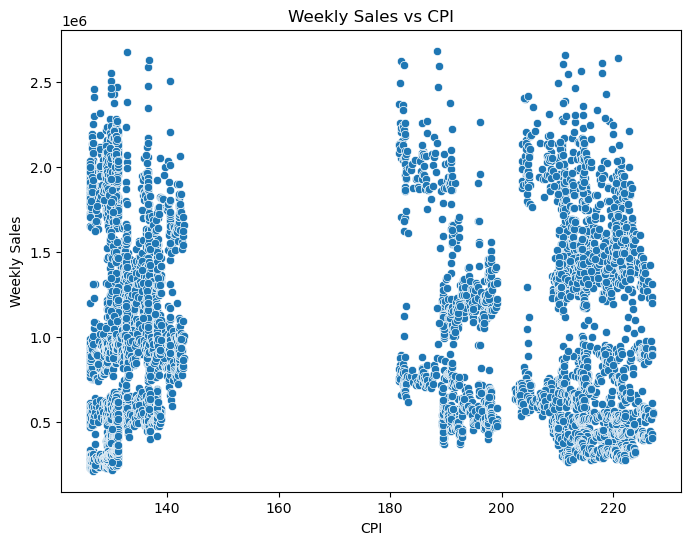

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

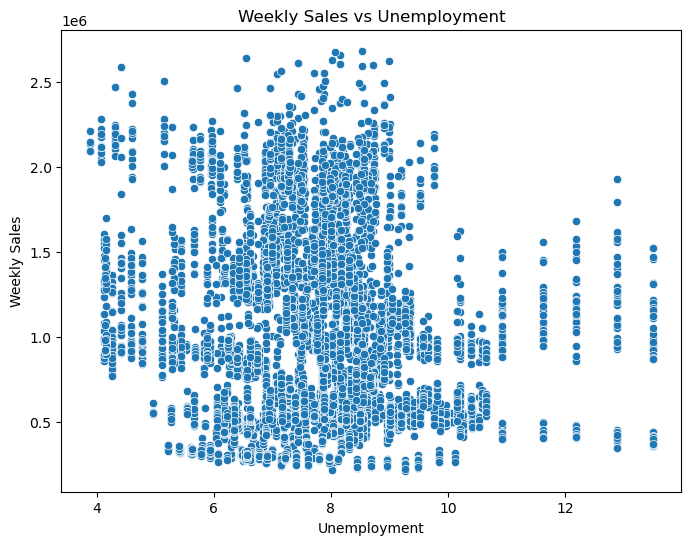

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

# 4) Time Series Analysis

In [25]:
data=df.groupby("Date")["Weekly_Sales"].sum()
data = pd.DataFrame(data)

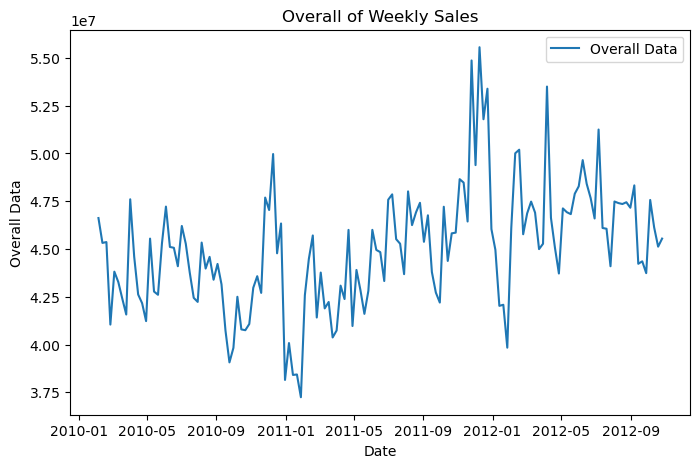

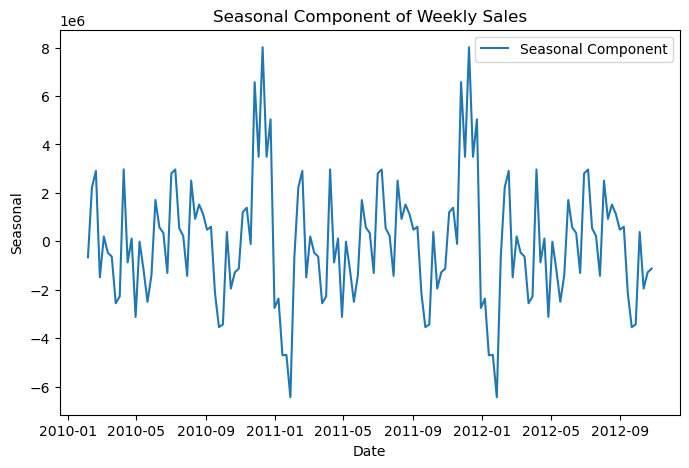

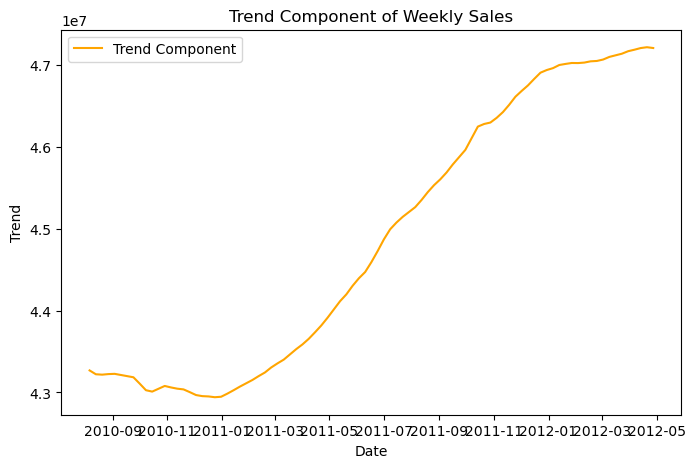

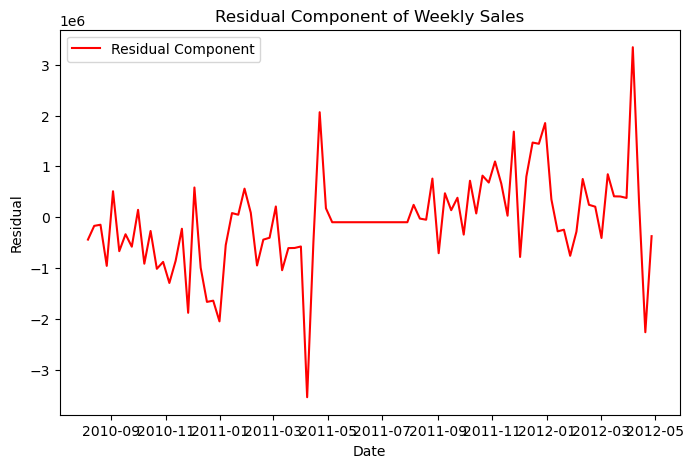

In [26]:

result = seasonal_decompose(data['Weekly_Sales'], model='add')

# Access the seasonal component
seasonal = result.seasonal
trend = result.trend
residual = result.resid


plt.figure(figsize=(8,5))
plt.plot(data, label="Overall Data")
plt.title('Overall of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Overall Data')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()
plt.show()


# Plot trend component
plt.figure(figsize=(8, 5))
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()


# Residual component
plt.figure(figsize=(8, 5))
plt.plot(residual, label='Residual Component', color='red')
plt.title('Residual Component of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

# 1. Weekly Data Prediction

In [48]:
df["Weekly"]=df['Date'].dt.to_period('W').dt.to_timestamp()
weekly=df.groupby("Date")[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].sum()


In [49]:
weekly

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,
2010-02-05,46619845.70,1383.27,113.417,7168.563629,345.944
2010-02-12,45317630.91,1393.20,112.393,7172.663580,345.944
2010-02-19,45363033.79,1532.90,111.498,7174.647018,345.944
2010-02-26,41043557.90,1615.27,112.302,7176.277702,345.944
2010-03-05,43813776.69,1769.97,113.943,7177.908388,345.944
...,...,...,...,...,...
2012-09-28,43734899.40,3093.95,173.456,7936.811450,325.680
2012-10-05,47566639.31,2968.79,173.035,7942.727318,312.917
2012-10-12,46128514.25,2625.42,175.353,7948.643185,312.917


### Time Series Analysis

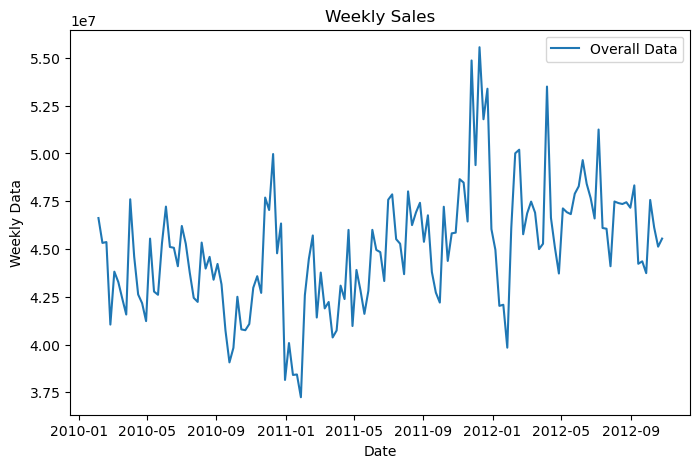

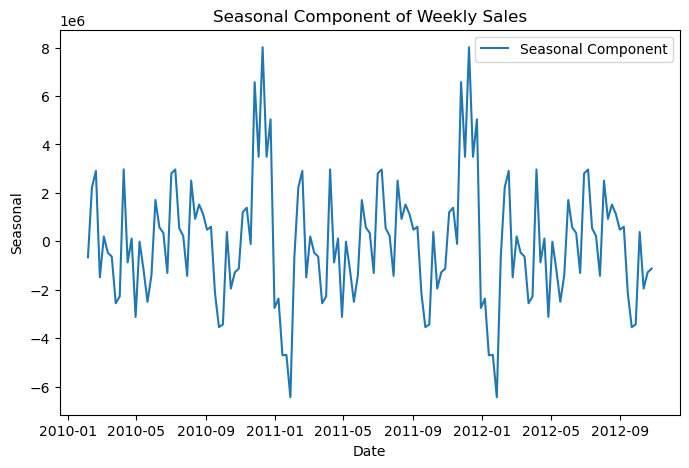

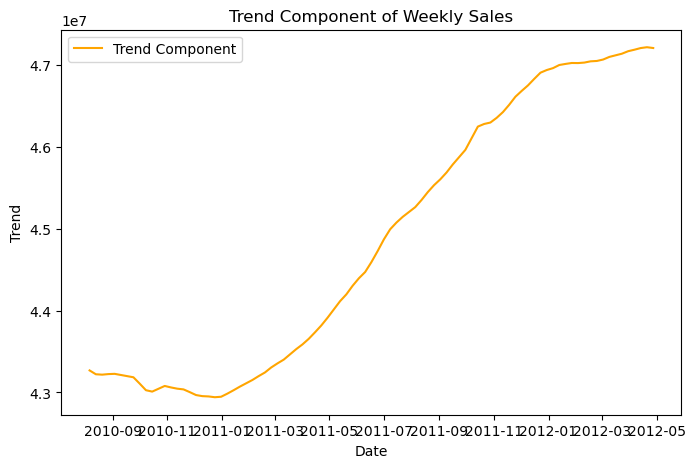

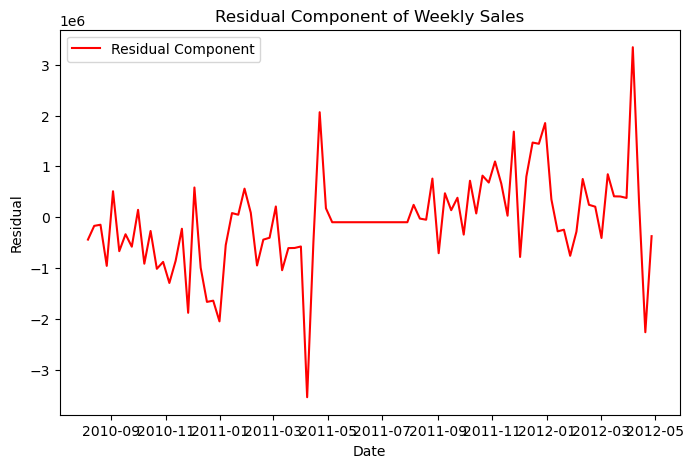

In [31]:
result_weekly = seasonal_decompose(weekly["Weekly_Sales"], model="add", period=52, two_sided=True)

# Access the seasonal, trend, and residual components
seasonal = result_weekly.seasonal
trend = result_weekly.trend
residual = result_weekly.resid

# Plot the overall data
plt.figure(figsize=(8, 5))
plt.plot(weekly["Weekly_Sales"], label="Overall Data")
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Data')
plt.legend()
plt.show()

# Plot seasonal component
plt.figure(figsize=(8, 5))
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()
plt.show()

# Plot trend component
plt.figure(figsize=(8, 5))
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()

# Plot residual component
plt.figure(figsize=(8, 5))
plt.plot(residual, label='Residual Component', color='red')
plt.title('Residual Component of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

# 2. Monthly Data Prediction

In [90]:
df["Monthly"] = df["Date"].dt.to_period("M").dt.to_timestamp()
monthly = df.groupby("Monthly")[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].sum()


## Time Series Analysis

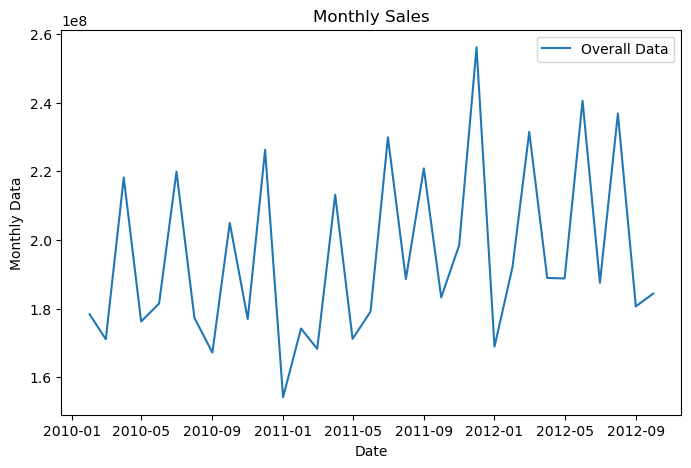

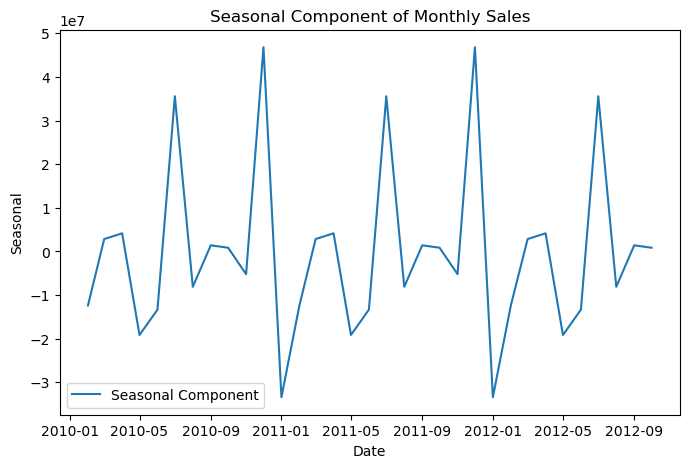

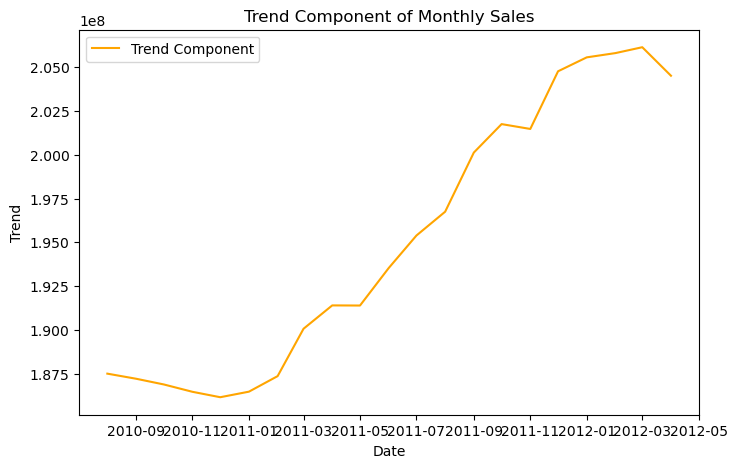

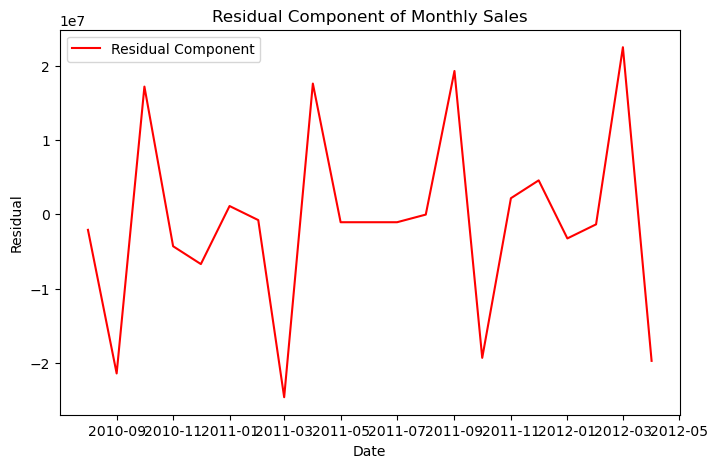

In [91]:
result_monthly = seasonal_decompose(monthly["Weekly_Sales"], model="add", period=12, two_sided=True)

# Access the seasonal, trend, and residual components
seasonal = result_monthly.seasonal
trend = result_monthly.trend
residual = result_monthly.resid

# Plot the overall data
plt.figure(figsize=(8, 5))
plt.plot(monthly["Weekly_Sales"], label="Overall Data")
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Monthly Data')
plt.legend()
plt.show()

# Plot seasonal component
plt.figure(figsize=(8, 5))
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()
plt.show()

# Plot trend component
plt.figure(figsize=(8, 5))
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()

# Plot residual component
plt.figure(figsize=(8, 5))
plt.plot(residual, label='Residual Component', color='red')
plt.title('Residual Component of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

# 3. Quarterly Data Prediction

In [104]:
df["Quarterly"] =df["Date"].dt.to_period("Q").dt.to_timestamp()
quarterly = df.groupby("Quarterly")[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].sum()


### Time Series Analysis

# Top 10 Store Analysis

In [64]:
total_sales_per_store = df.groupby("Store")["Weekly_Sales"].sum().reset_index()

# Sort stores by total sales in descending order and select top 10
top_10_stores = total_sales_per_store.sort_values(by="Weekly_Sales", ascending=False).head(10)

print("Top 10 Stores with Highest Total Weekly Sales:")
print(top_10_stores)

Top 10 Stores with Highest Total Weekly Sales:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08


# 1st Store Analysis

In [173]:
df = pd.read_csv("Walmart.csv")
store_1=df[df["Store"]==20]
store_1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,05-02-2010,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,12-02-2010,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,19-02-2010,2161549.76,0,25.43,2.745,204.432100,8.187
2720,20,26-02-2010,1898193.95,0,32.32,2.754,204.463087,8.187
2721,20,05-03-2010,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...,...
2855,20,28-09-2012,2008350.58,0,58.65,3.997,215.736716,7.280
2856,20,05-10-2012,2246411.89,0,60.77,3.985,215.925886,7.293
2857,20,12-10-2012,2162951.36,0,47.20,4.000,216.115057,7.293
2858,20,19-10-2012,1999363.49,0,56.26,3.969,216.146470,7.293


In [174]:
store_1.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [175]:
store_1["Date"]=pd.to_datetime(store_1['Date'], format='%d-%m-%Y')

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\1204714536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1["Date"]=pd.to_datetime(store_1['Date'], format='%d-%m-%Y')


In [189]:
store_1.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [190]:
store1 = df.groupby("Date")[["Weekly_Sales"]].sum()

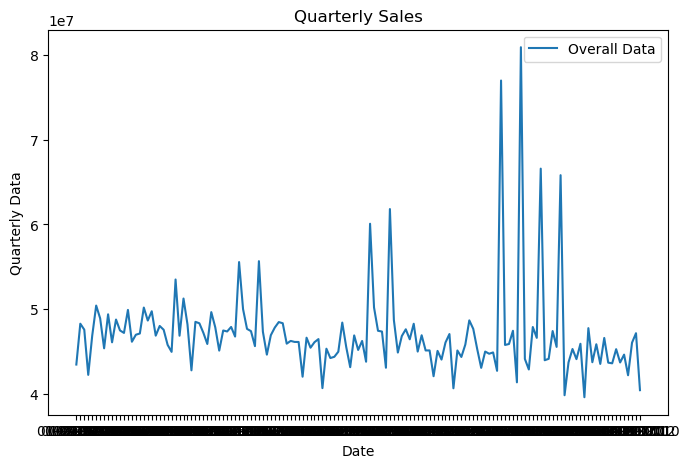

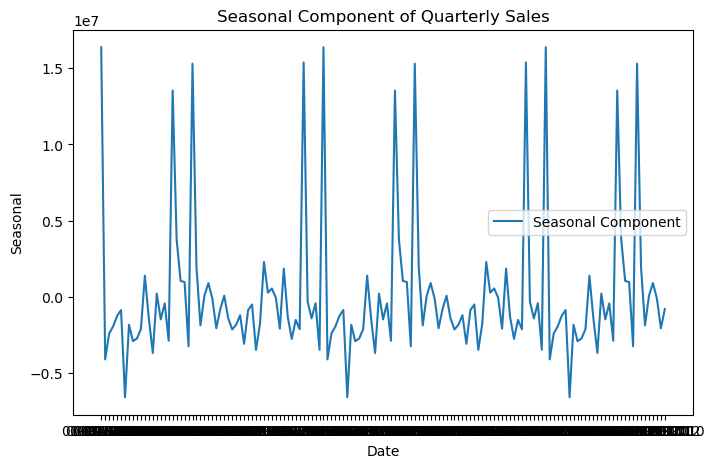

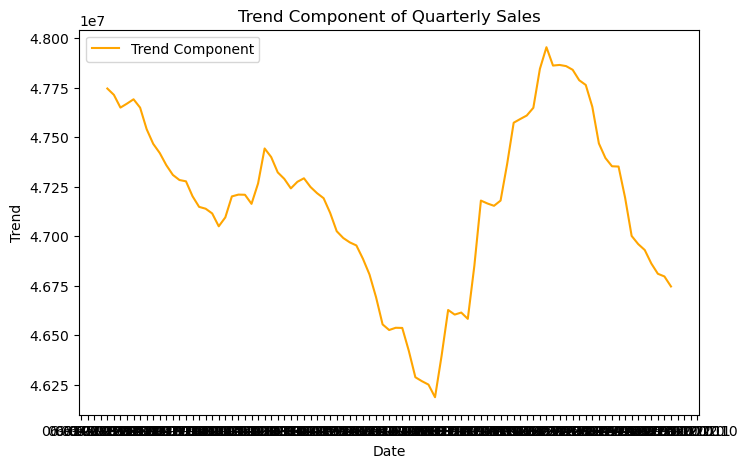

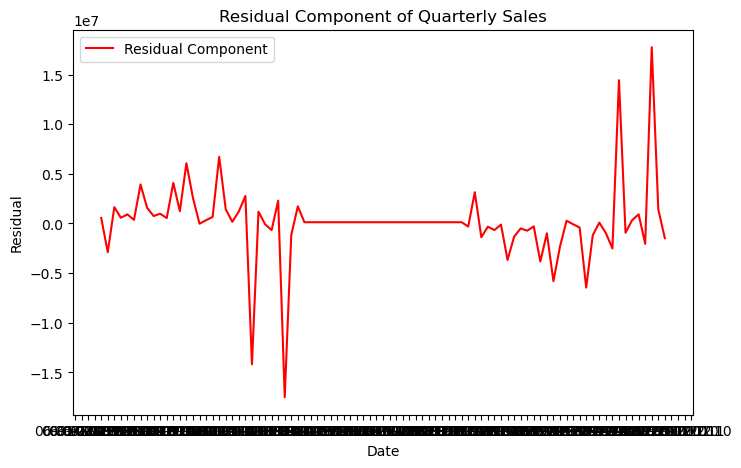

In [192]:
result_quarterly = seasonal_decompose(store1["Weekly_Sales"], model="add", period=56, two_sided=True)

# Access the seasonal, trend, and residual components
seasonal = result_quarterly.seasonal
trend = result_quarterly.trend
residual = result_quarterly.resid

# Plot the overall data
plt.figure(figsize=(8, 5))
plt.plot(store1["Weekly_Sales"], label="Overall Data")
plt.title('Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Quarterly Data')
plt.legend()
plt.show()

# Plot seasonal component
plt.figure(figsize=(8, 5))
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()
plt.show()

# Plot trend component
plt.figure(figsize=(8, 5))
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component of Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()

# Plot residual component
plt.figure(figsize=(8, 5))
plt.plot(residual, label='Residual Component', color='red')
plt.title('Residual Component of Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

## EDA 

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\306440668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_1['Weekly_Sales'], kde=True)
C:\Users\Nexgen\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\306440668.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

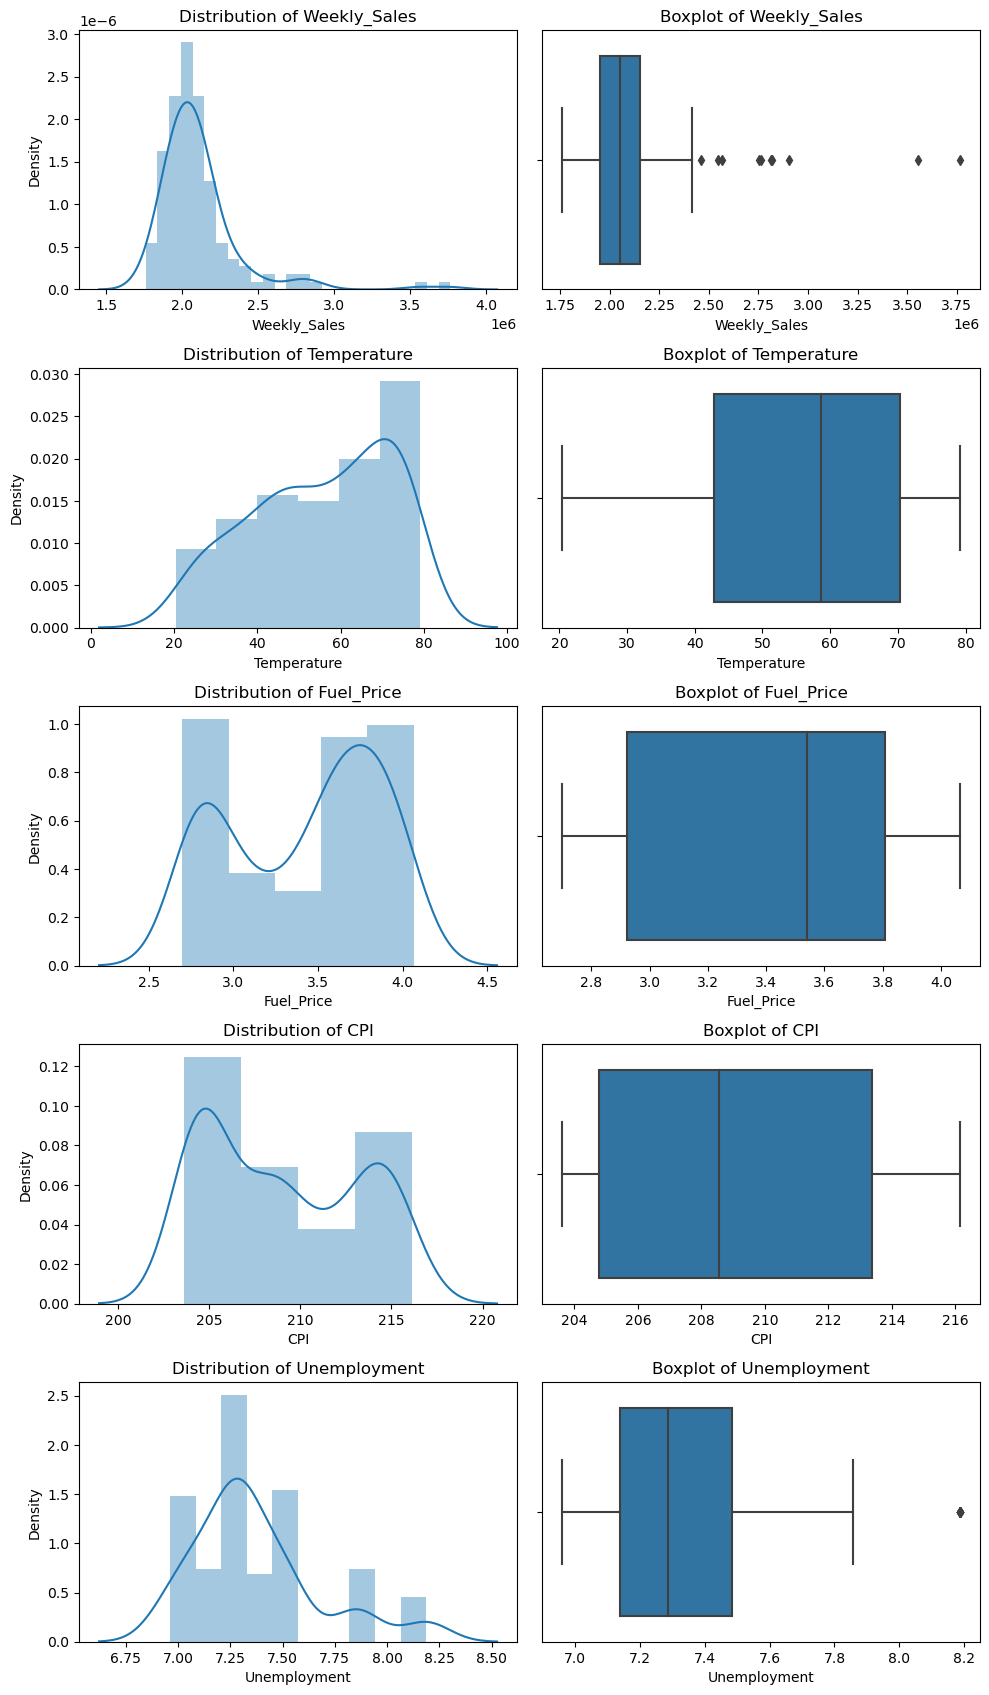

In [50]:
plt.figure(figsize=(10,20))
# Plot 1: Distribution and Boxplot of Weekly_Sales
plt.subplot(6, 2, 1)
sns.distplot(store_1['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly_Sales')

plt.subplot(6, 2, 2)
sns.boxplot(x=store_1['Weekly_Sales'])
plt.title('Boxplot of Weekly_Sales')

# Plot 2: Distribution and Boxplot of Temperature
plt.subplot(6, 2, 3)
sns.distplot(store_1['Temperature'])
plt.title('Distribution of Temperature')

plt.subplot(6, 2, 4)
sns.boxplot(x=store_1['Temperature'])
plt.title('Boxplot of Temperature')

# Plot 3: Distribution and Boxplot of Fuel_Price
plt.subplot(6, 2, 5)
sns.distplot(store_1['Fuel_Price'])
plt.title('Distribution of Fuel_Price')

plt.subplot(6, 2, 6)
sns.boxplot(x=store_1['Fuel_Price'])
plt.title('Boxplot of Fuel_Price')

# Plot 4: Distribution and Boxplot of CPI
plt.subplot(6, 2, 7)
sns.distplot(store_1['CPI'])
plt.title('Distribution of CPI')

plt.subplot(6, 2, 8)
sns.boxplot(x=store_1['CPI'])
plt.title('Boxplot of CPI')

# Plot 5: Distribution and Boxplot of Unemployment
plt.subplot(6, 2, 9)
sns.distplot(store_1['Unemployment'])
plt.title('Distribution of Unemployment')

plt.subplot(6, 2, 10)
sns.boxplot(x=store_1['Unemployment'])
plt.title('Boxplot of Unemployment')

# Adjust layout
plt.tight_layout()
plt.show()

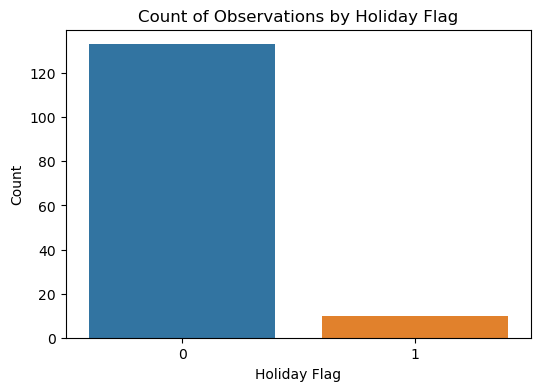

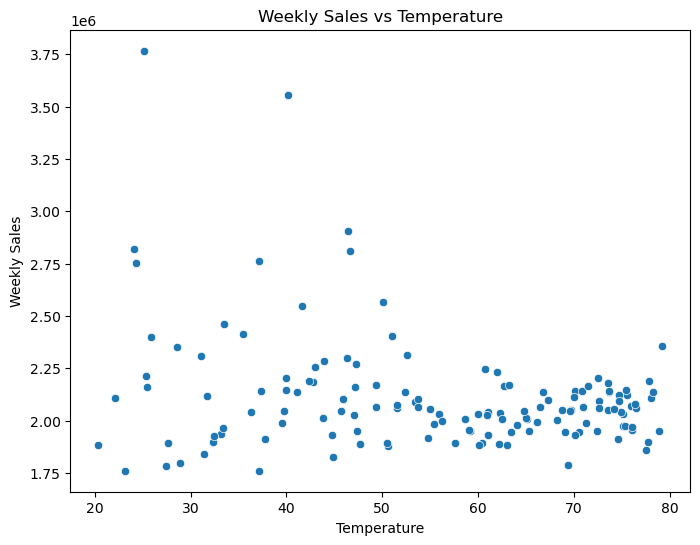

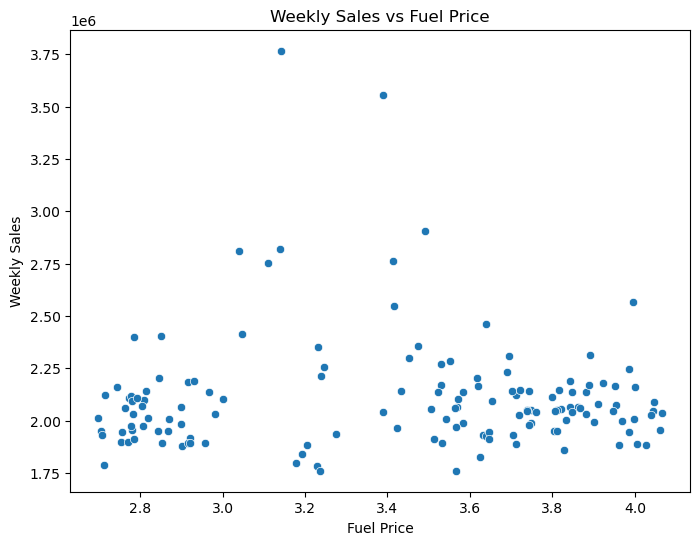

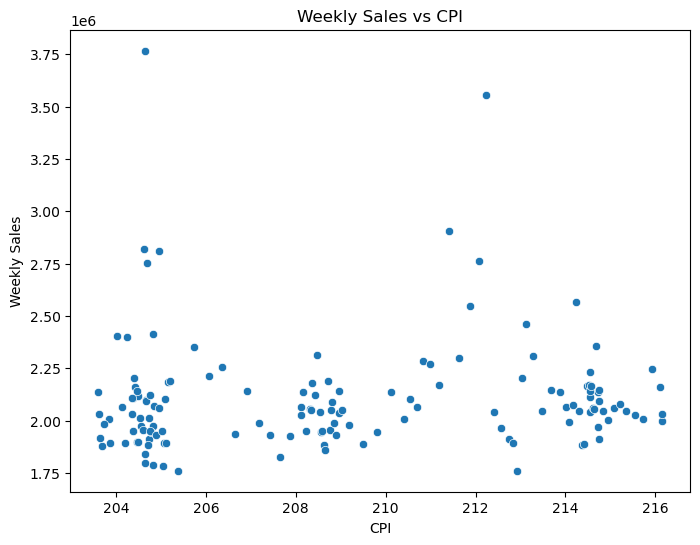

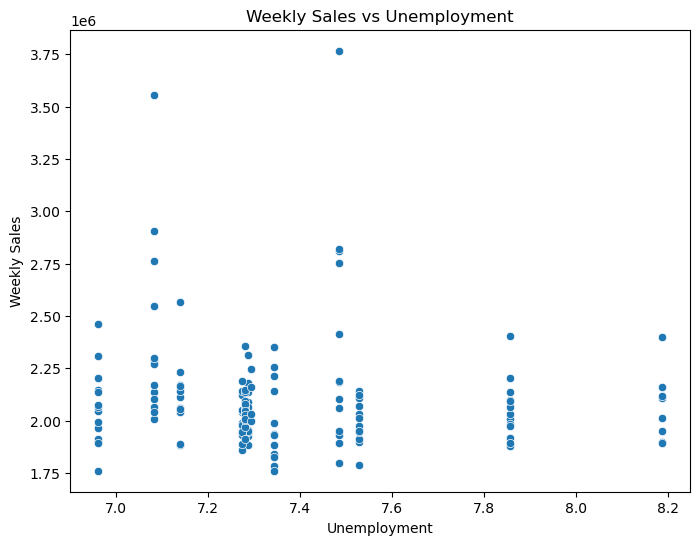

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Holiday_Flag', data=store_1)
plt.title('Count of Observations by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

# 2nd Store Analysis

In [52]:
store_1 = store_data[4]

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\306440668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_1['Weekly_Sales'], kde=True)
C:\Users\Nexgen\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\306440668.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

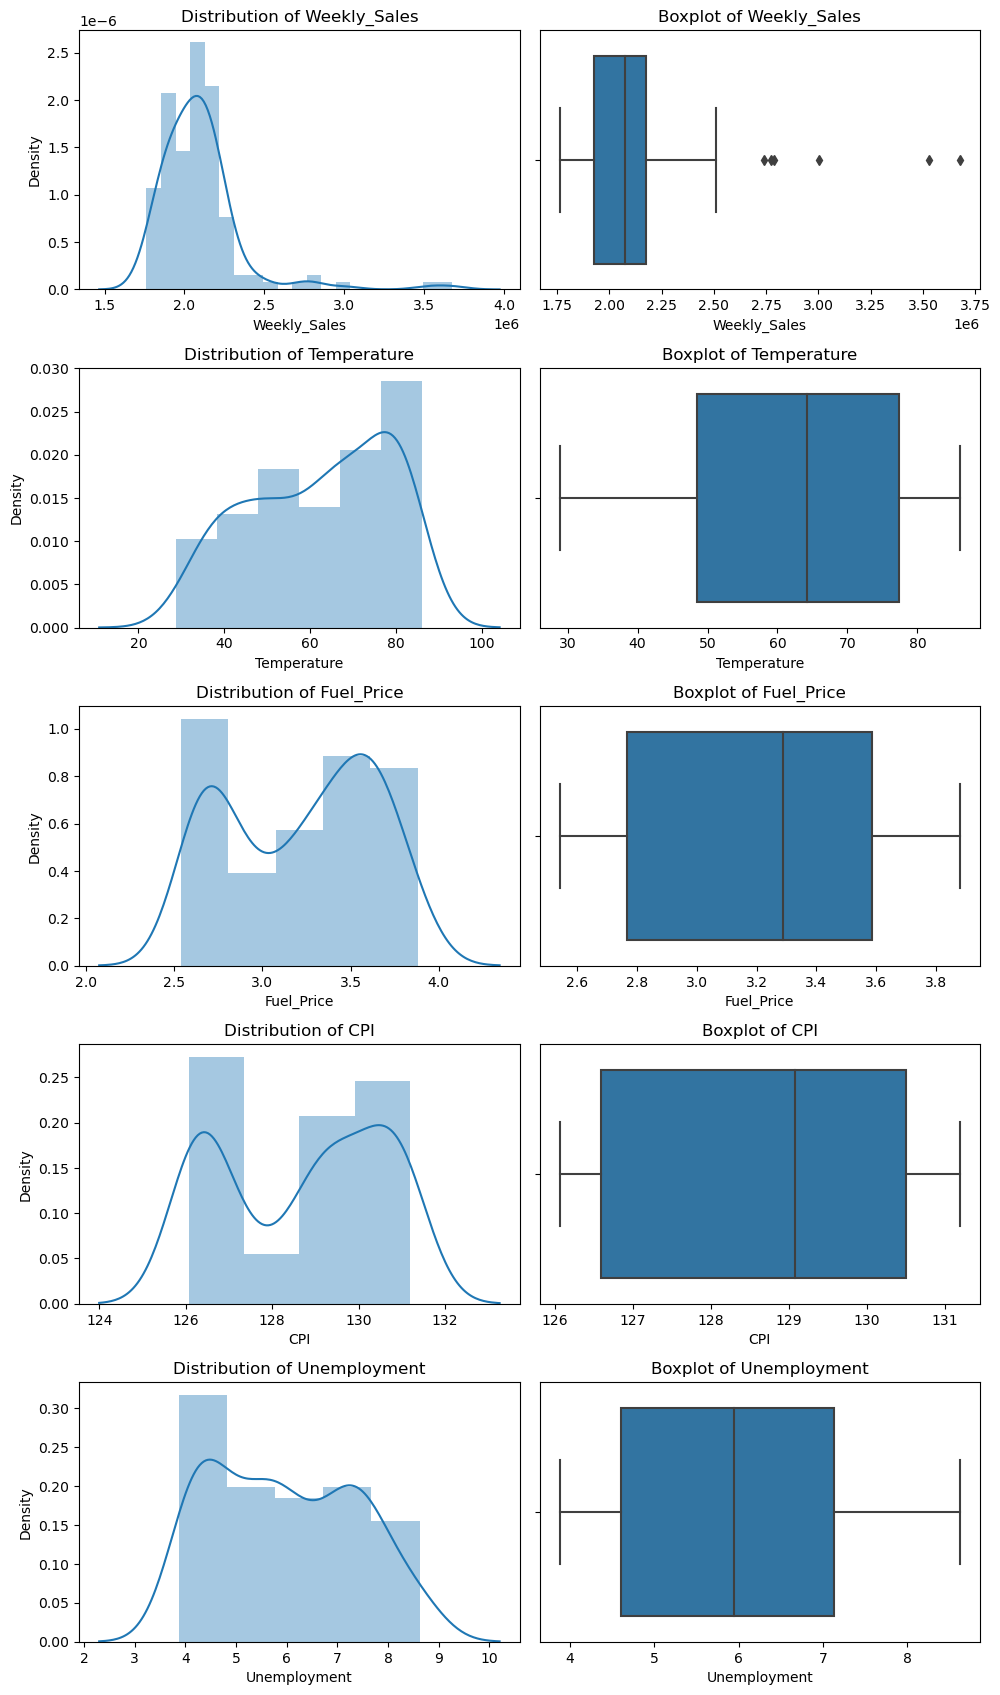

In [53]:
plt.figure(figsize=(10,20))
# Plot 1: Distribution and Boxplot of Weekly_Sales
plt.subplot(6, 2, 1)
sns.distplot(store_1['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly_Sales')

plt.subplot(6, 2, 2)
sns.boxplot(x=store_1['Weekly_Sales'])
plt.title('Boxplot of Weekly_Sales')

# Plot 2: Distribution and Boxplot of Temperature
plt.subplot(6, 2, 3)
sns.distplot(store_1['Temperature'])
plt.title('Distribution of Temperature')

plt.subplot(6, 2, 4)
sns.boxplot(x=store_1['Temperature'])
plt.title('Boxplot of Temperature')

# Plot 3: Distribution and Boxplot of Fuel_Price
plt.subplot(6, 2, 5)
sns.distplot(store_1['Fuel_Price'])
plt.title('Distribution of Fuel_Price')

plt.subplot(6, 2, 6)
sns.boxplot(x=store_1['Fuel_Price'])
plt.title('Boxplot of Fuel_Price')

# Plot 4: Distribution and Boxplot of CPI
plt.subplot(6, 2, 7)
sns.distplot(store_1['CPI'])
plt.title('Distribution of CPI')

plt.subplot(6, 2, 8)
sns.boxplot(x=store_1['CPI'])
plt.title('Boxplot of CPI')

# Plot 5: Distribution and Boxplot of Unemployment
plt.subplot(6, 2, 9)
sns.distplot(store_1['Unemployment'])
plt.title('Distribution of Unemployment')

plt.subplot(6, 2, 10)
sns.boxplot(x=store_1['Unemployment'])
plt.title('Boxplot of Unemployment')

# Adjust layout
plt.tight_layout()
plt.show()

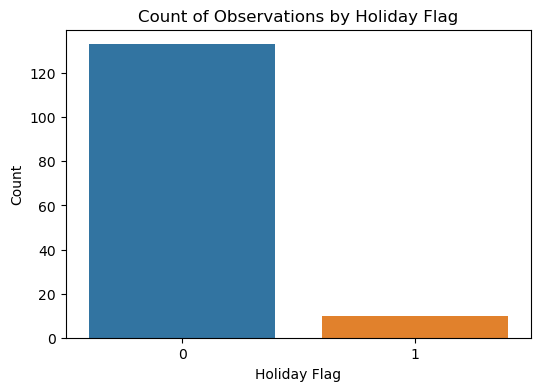

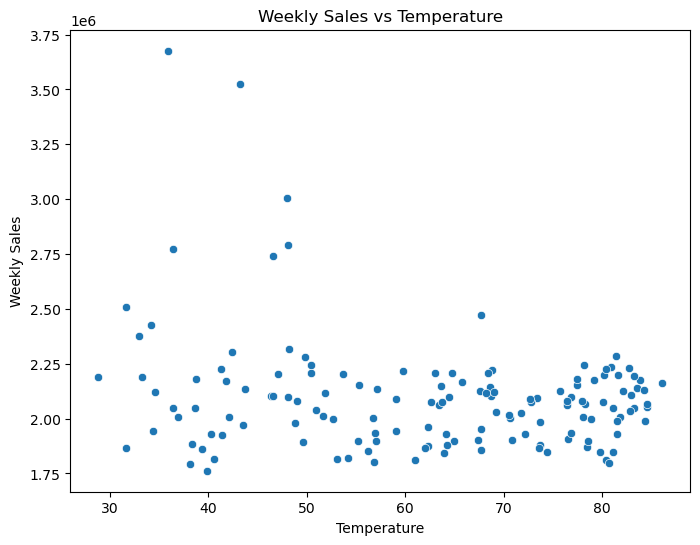

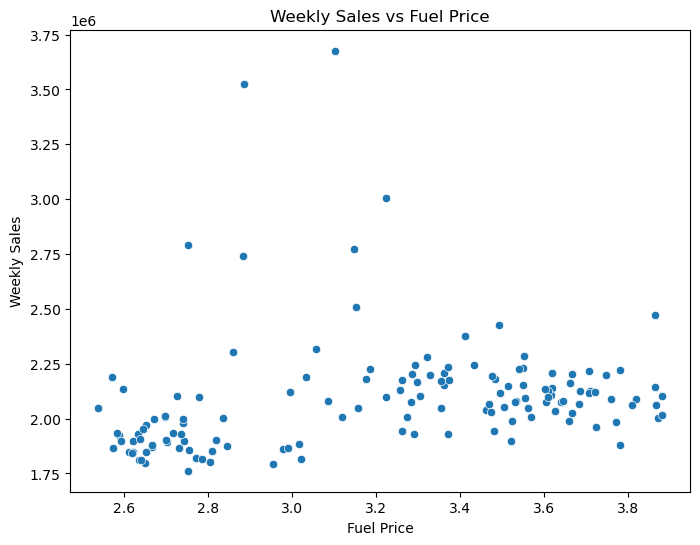

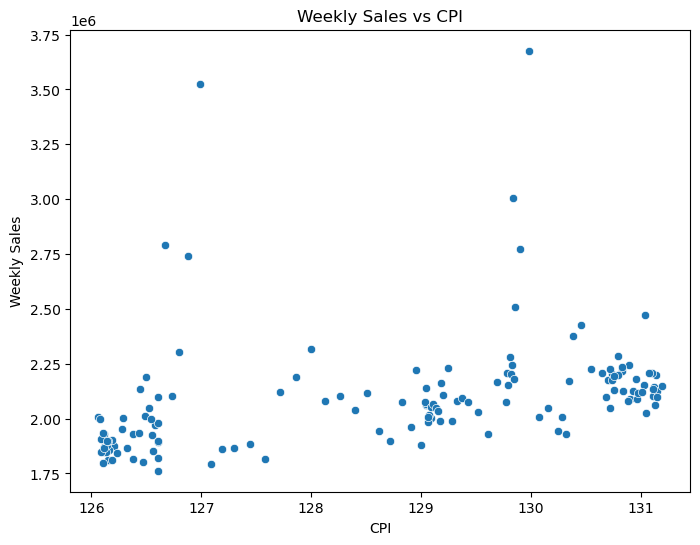

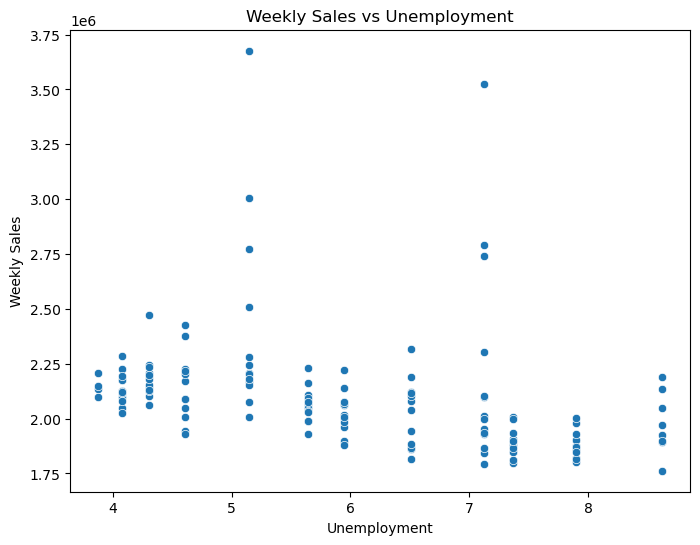

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Holiday_Flag', data=store_1)
plt.title('Count of Observations by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

# 3rd Store Analysis

In [57]:
store_1 = store_data[14]

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\306440668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_1['Weekly_Sales'], kde=True)
C:\Users\Nexgen\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\306440668.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

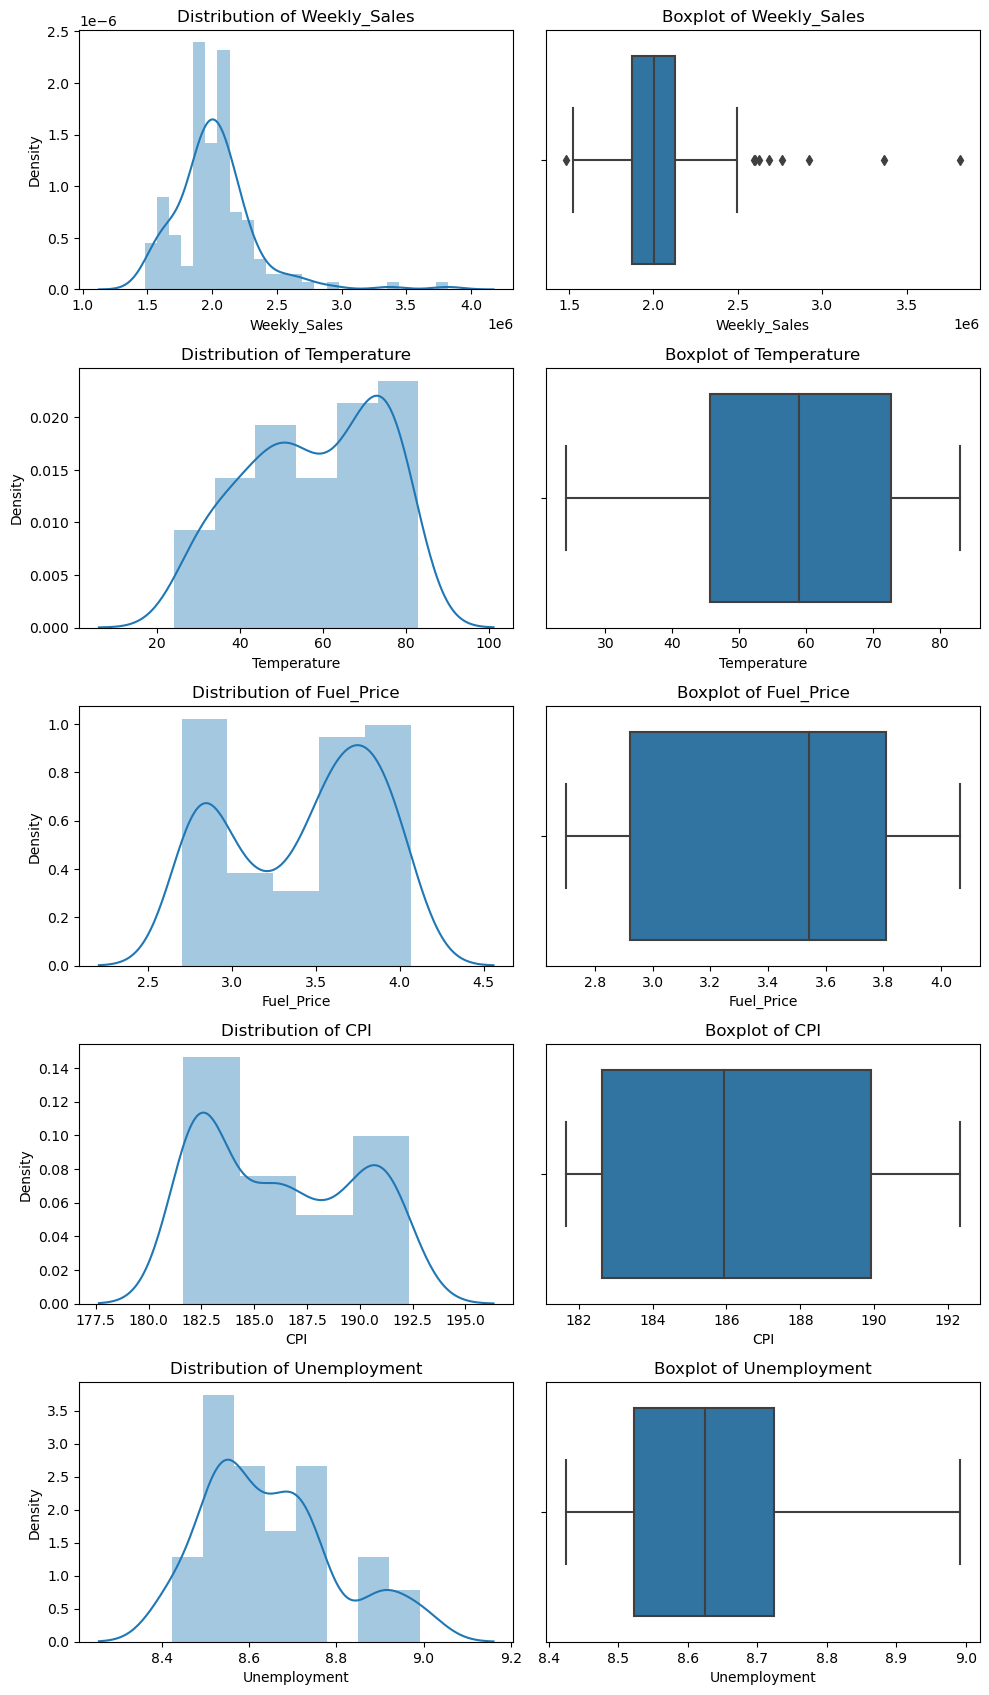

In [58]:
plt.figure(figsize=(10,20))
# Plot 1: Distribution and Boxplot of Weekly_Sales
plt.subplot(6, 2, 1)
sns.distplot(store_1['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly_Sales')

plt.subplot(6, 2, 2)
sns.boxplot(x=store_1['Weekly_Sales'])
plt.title('Boxplot of Weekly_Sales')

# Plot 2: Distribution and Boxplot of Temperature
plt.subplot(6, 2, 3)
sns.distplot(store_1['Temperature'])
plt.title('Distribution of Temperature')

plt.subplot(6, 2, 4)
sns.boxplot(x=store_1['Temperature'])
plt.title('Boxplot of Temperature')

# Plot 3: Distribution and Boxplot of Fuel_Price
plt.subplot(6, 2, 5)
sns.distplot(store_1['Fuel_Price'])
plt.title('Distribution of Fuel_Price')

plt.subplot(6, 2, 6)
sns.boxplot(x=store_1['Fuel_Price'])
plt.title('Boxplot of Fuel_Price')

# Plot 4: Distribution and Boxplot of CPI
plt.subplot(6, 2, 7)
sns.distplot(store_1['CPI'])
plt.title('Distribution of CPI')

plt.subplot(6, 2, 8)
sns.boxplot(x=store_1['CPI'])
plt.title('Boxplot of CPI')

# Plot 5: Distribution and Boxplot of Unemployment
plt.subplot(6, 2, 9)
sns.distplot(store_1['Unemployment'])
plt.title('Distribution of Unemployment')

plt.subplot(6, 2, 10)
sns.boxplot(x=store_1['Unemployment'])
plt.title('Boxplot of Unemployment')

# Adjust layout
plt.tight_layout()
plt.show()

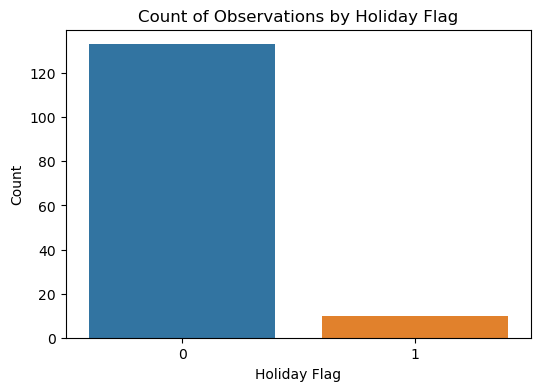

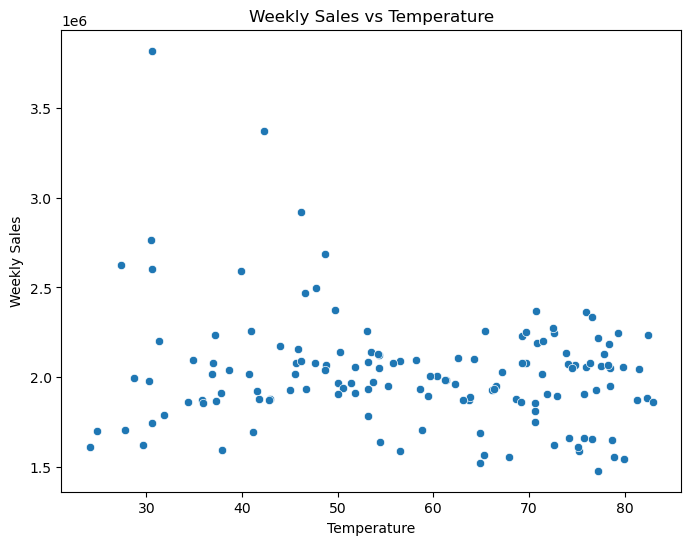

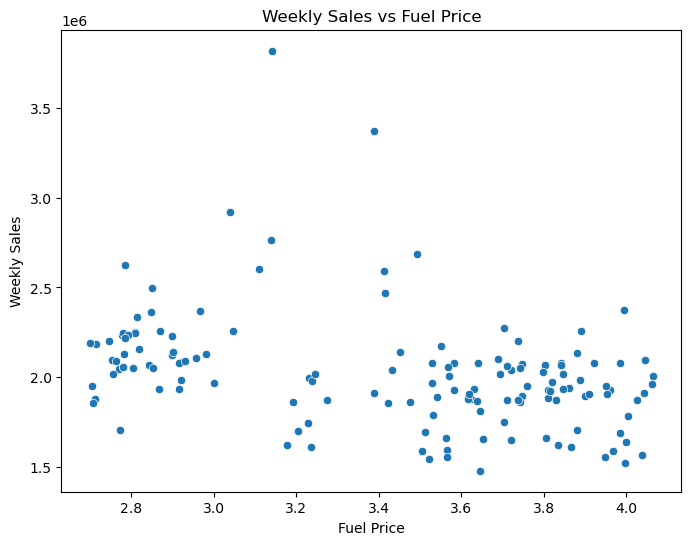

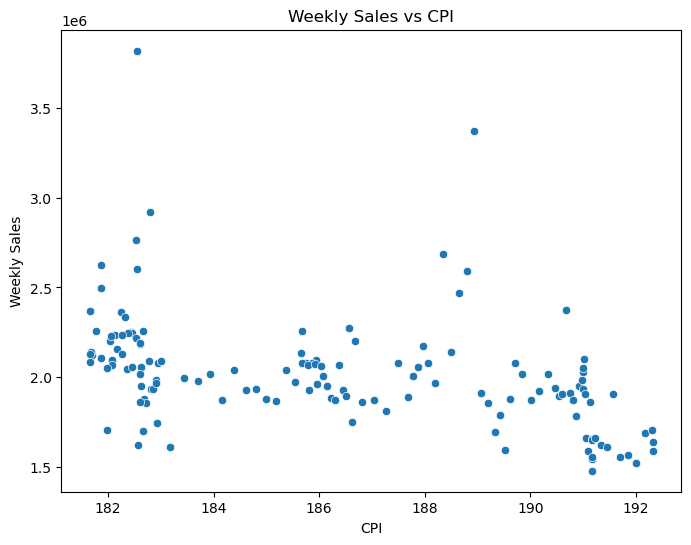

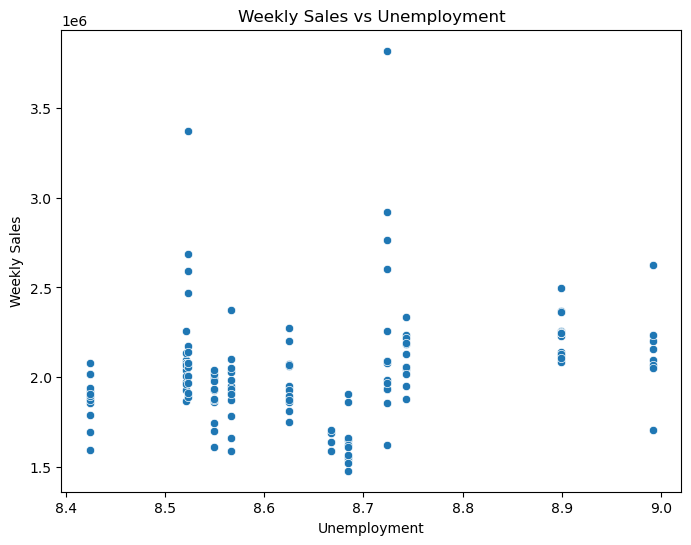

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Holiday_Flag', data=store_1)
plt.title('Count of Observations by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

# 4th Store Analysis

In [ ]:
store_1 = store_data[13]

In [ ]:
plt.figure(figsize=(10,20))
# Plot 1: Distribution and Boxplot of Weekly_Sales
plt.subplot(6, 2, 1)
sns.distplot(store_1['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly_Sales')

plt.subplot(6, 2, 2)
sns.boxplot(x=store_1['Weekly_Sales'])
plt.title('Boxplot of Weekly_Sales')

# Plot 2: Distribution and Boxplot of Temperature
plt.subplot(6, 2, 3)
sns.distplot(store_1['Temperature'])
plt.title('Distribution of Temperature')

plt.subplot(6, 2, 4)
sns.boxplot(x=store_1['Temperature'])
plt.title('Boxplot of Temperature')

# Plot 3: Distribution and Boxplot of Fuel_Price
plt.subplot(6, 2, 5)
sns.distplot(store_1['Fuel_Price'])
plt.title('Distribution of Fuel_Price')

plt.subplot(6, 2, 6)
sns.boxplot(x=store_1['Fuel_Price'])
plt.title('Boxplot of Fuel_Price')

# Plot 4: Distribution and Boxplot of CPI
plt.subplot(6, 2, 7)
sns.distplot(store_1['CPI'])
plt.title('Distribution of CPI')

plt.subplot(6, 2, 8)
sns.boxplot(x=store_1['CPI'])
plt.title('Boxplot of CPI')

# Plot 5: Distribution and Boxplot of Unemployment
plt.subplot(6, 2, 9)
sns.distplot(store_1['Unemployment'])
plt.title('Distribution of Unemployment')

plt.subplot(6, 2, 10)
sns.boxplot(x=store_1['Unemployment'])
plt.title('Boxplot of Unemployment')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Holiday_Flag', data=store_1)
plt.title('Count of Observations by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

# 5th Store Analysis 

In [59]:
store_1 = store_data[2]

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\306440668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_1['Weekly_Sales'], kde=True)
C:\Users\Nexgen\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11668\306440668.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

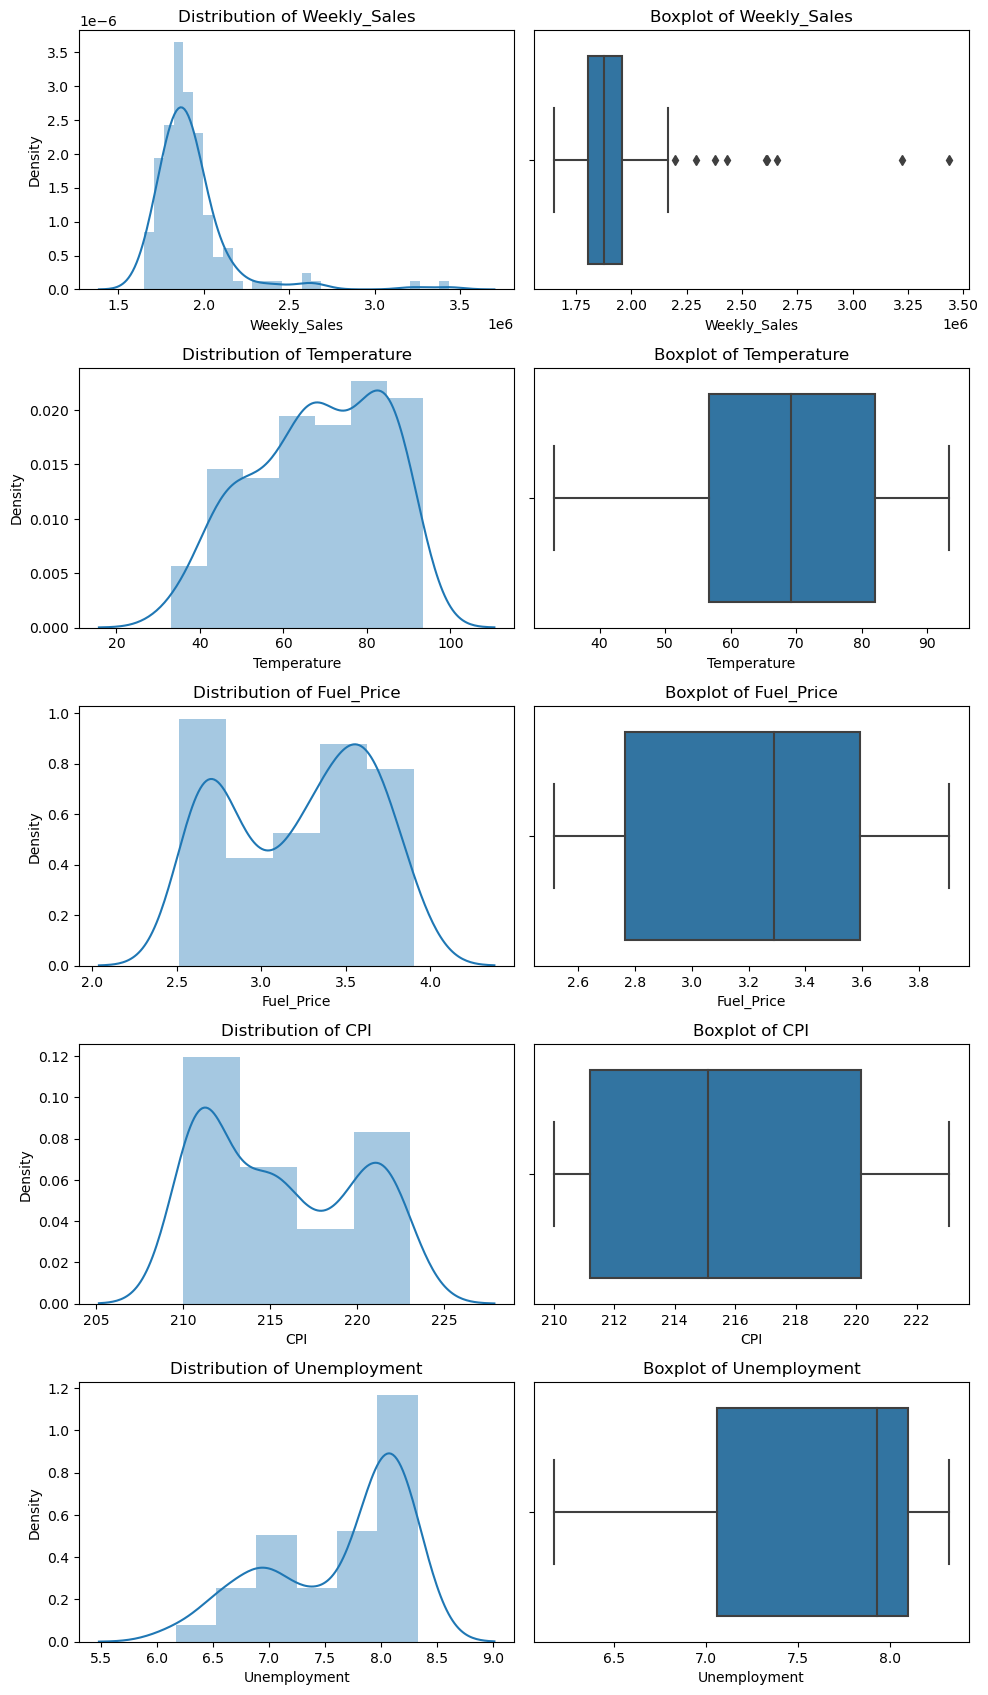

In [60]:
plt.figure(figsize=(10,20))
# Plot 1: Distribution and Boxplot of Weekly_Sales
plt.subplot(6, 2, 1)
sns.distplot(store_1['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly_Sales')

plt.subplot(6, 2, 2)
sns.boxplot(x=store_1['Weekly_Sales'])
plt.title('Boxplot of Weekly_Sales')

# Plot 2: Distribution and Boxplot of Temperature
plt.subplot(6, 2, 3)
sns.distplot(store_1['Temperature'])
plt.title('Distribution of Temperature')

plt.subplot(6, 2, 4)
sns.boxplot(x=store_1['Temperature'])
plt.title('Boxplot of Temperature')

# Plot 3: Distribution and Boxplot of Fuel_Price
plt.subplot(6, 2, 5)
sns.distplot(store_1['Fuel_Price'])
plt.title('Distribution of Fuel_Price')

plt.subplot(6, 2, 6)
sns.boxplot(x=store_1['Fuel_Price'])
plt.title('Boxplot of Fuel_Price')

# Plot 4: Distribution and Boxplot of CPI
plt.subplot(6, 2, 7)
sns.distplot(store_1['CPI'])
plt.title('Distribution of CPI')

plt.subplot(6, 2, 8)
sns.boxplot(x=store_1['CPI'])
plt.title('Boxplot of CPI')

# Plot 5: Distribution and Boxplot of Unemployment
plt.subplot(6, 2, 9)
sns.distplot(store_1['Unemployment'])
plt.title('Distribution of Unemployment')

plt.subplot(6, 2, 10)
sns.boxplot(x=store_1['Unemployment'])
plt.title('Boxplot of Unemployment')

# Adjust layout
plt.tight_layout()
plt.show()

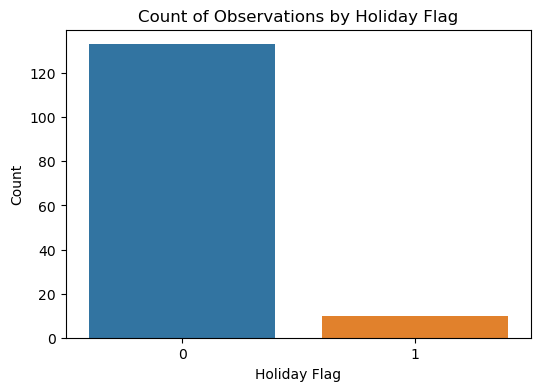

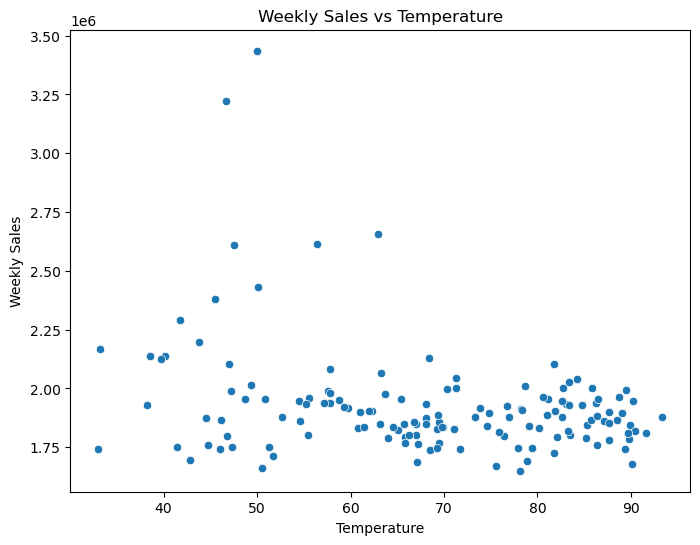

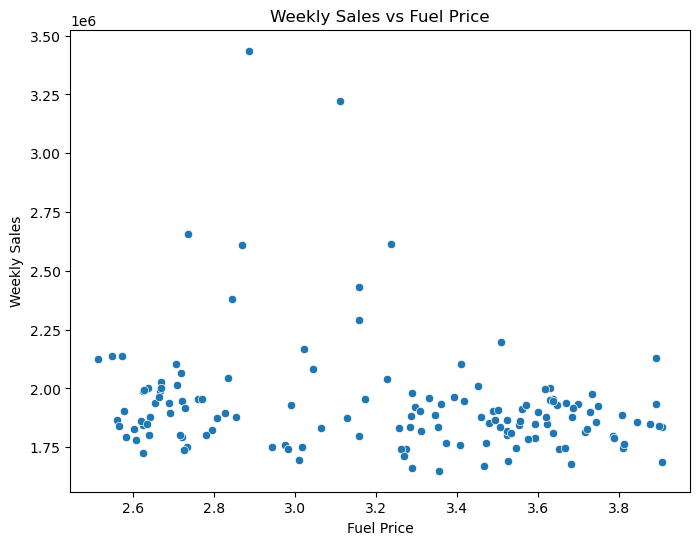

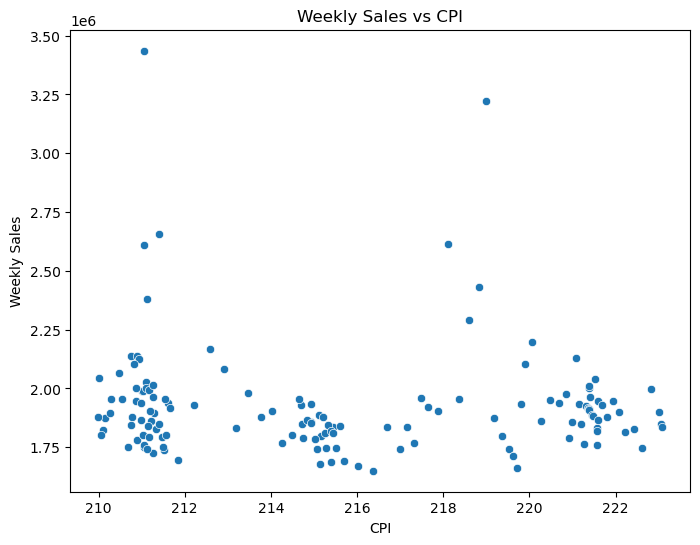

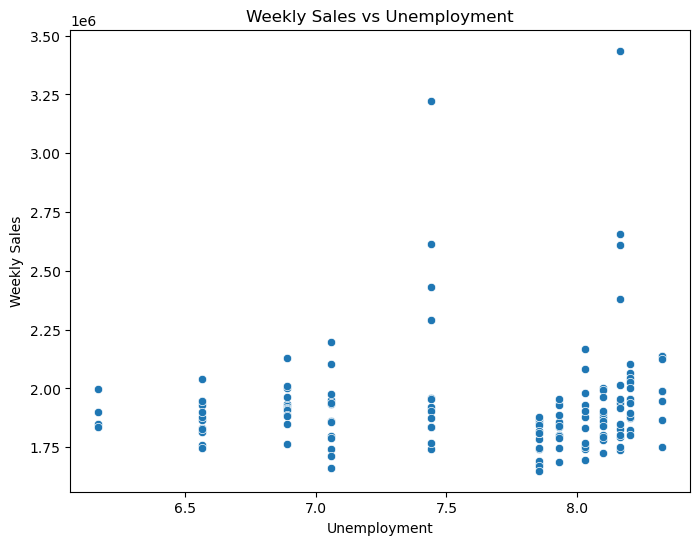

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Holiday_Flag', data=store_1)
plt.title('Count of Observations by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_1)
plt.title('Weekly Sales vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()